In [1]:
import tensorflow as tf
from tensorflow.keras import Model, activations
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorboard
import seaborn as sns
from matplotlib import pyplot as plt
print('imports successful')

imports successful


In [2]:
#references (move to md):
#Data:
#https://www.kaggle.com/arshid/iris-flower-dataset
#
#Code references:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#

In [3]:
tf.__version__

&#39;2.3.0&#39;

In [4]:
iris_df = pd.read_csv('/home/bathan/Documents/Code/DAG_NN/Data/IRIS.csv',delimiter=',')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


&lt;seaborn.axisgrid.PairGrid at 0x7fe7d7556d10&gt;

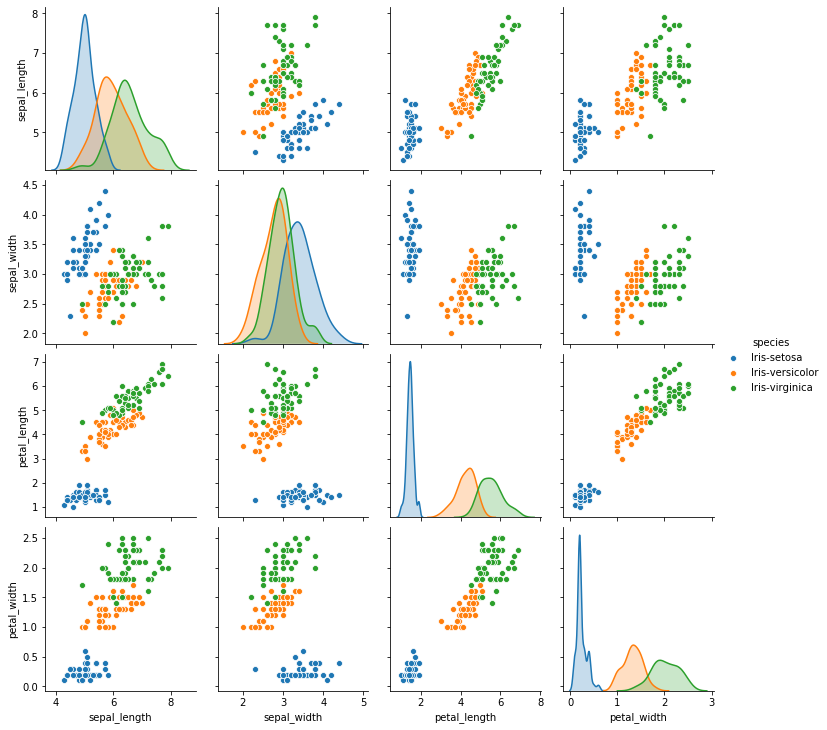

In [5]:
#examine clustering
#kmeans or KNN could be more efficient for actually classifying flowers. However, the point of this project is to demonstrate an extremely flexible netowrk architecture.
sns.pairplot(data=iris_df, hue='species')

In [6]:
#encode flower species
#this will display 'nan' in species if run more than once
flower_map = {'Iris-setosa': 0.0, 'Iris-versicolor': 0.5, 'Iris-virginica': 1.0}
iris_df['species'] = iris_df['species'].map(flower_map)
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      1.0
146           6.3          2.5           5.0          1.9      1.0
147           6.5          3.0           5.2          2.0      1.0
148           6.2          3.4           5.4          2.3      1.0
149           5.9          3.0           5.1          1.8      1.0

[150 rows x 5 columns]


In [7]:
#train/test split, 90% to training, 10% to testing
#note seed for shuffle replication
#This mixes row index, but mixed row index doesn't matter for np.array
x_train, x_test, y_train, y_test = train_test_split(
                                                    iris_df.loc[:, 'sepal_length':'petal_width'],
                                                    iris_df.loc[:, 'species'], test_size=0.2, random_state=42)

In [8]:
#ensure data split
[print(i.head()) for i in [x_train, x_test, y_train, y_test]]

    sepal_length  sepal_width  petal_length  petal_width
22           4.6          3.6           1.0          0.2
15           5.7          4.4           1.5          0.4
65           6.7          3.1           4.4          1.4
11           4.8          3.4           1.6          0.2
42           4.4          3.2           1.3          0.2
     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
22    0.0
15    0.0
65    0.5
11    0.0
42    0.0
Name: species, dtype: float64
73     0.5
18     0.0
118    1.0
78     0.5
76     0.5
Name: species, dtype: float64


[None, None, None, None]

In [9]:
y_test = np.array(y_test)

In [10]:
input_layer = Input(shape=(4,))

#deliberately more linear layers than needed
linear1 = Dense(16,activation='sigmoid')(input_layer)
linear2 = Dense(16,activation='sigmoid')(linear1)
linear3 = Dense(16,activation='sigmoid')(linear2)
linear4 = Dense(16,activation='sigmoid')(linear3)

output = Dense(1,activation='sigmoid')(linear4)

dense_model = tf.keras.Model(inputs=input_layer, outputs=output)
dense_model.summary()

Model: &quot;functional_1&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 913
Trainable params: 913
Non-trainable params: 0
______________________________________________

In [11]:
input_layer = Input(shape=(4,))

#deliberately more linear layers than needed
linear1 = Dense(16,activation='sigmoid')(input_layer)
linear2 = Dense(16,activation='sigmoid')(linear1)
linear3 = Dense(16,activation='sigmoid')(linear2)
linear4 = Dense(16,activation='sigmoid')(linear3)

#layers also map straight from each sequential layer to the output
concatenate = tf.keras.layers.Concatenate()([input_layer, linear1, linear2, linear3, linear4])
output = Dense(1,activation='sigmoid')(concatenate)

dag_model = tf.keras.Model(inputs=input_layer, outputs=output)
dag_model.summary()

Model: &quot;functional_3&quot;
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 16)           80          input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 16)           272         dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 16)           272         dense_6[0][0]                    
_____________________________________________________________________________

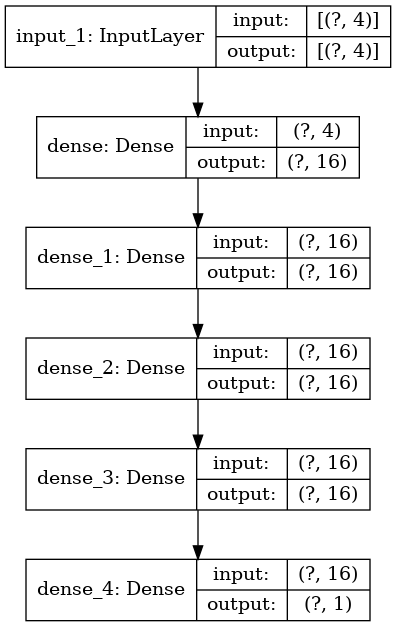

In [12]:
#visualize networks - 
tf.keras.utils.plot_model(dense_model, "dense_arch.png", show_shapes=True)

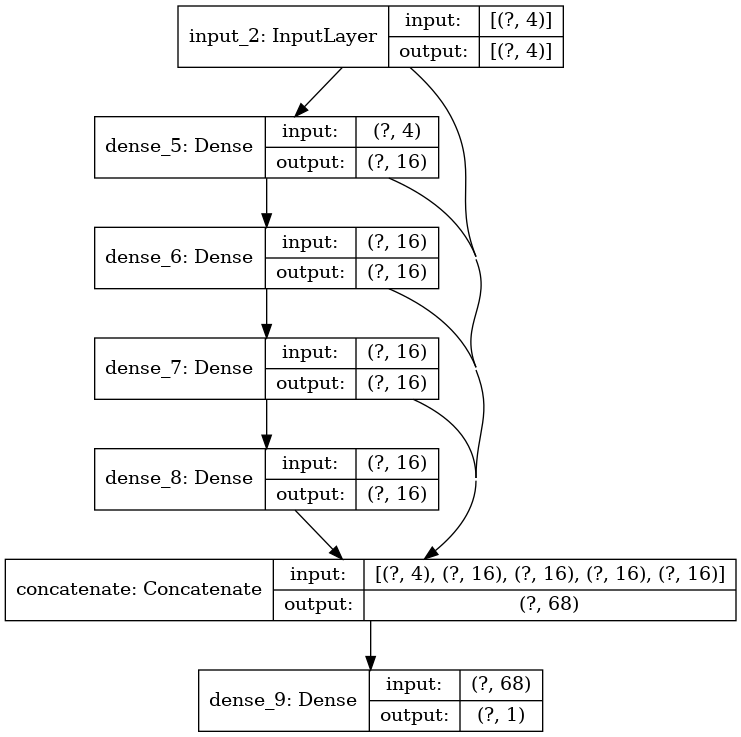

In [13]:
tf.keras.utils.plot_model(dag_model, "dag_arch.png", show_shapes=True)

In [14]:
dense_model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['accuracy'])
dag_model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['accuracy'])

In [16]:
dense_model.fit(x_train, y_train, epochs=100)
dag_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 694us/step - loss: 0.1011 - accuracy: 0.6583
Epoch 2/100
4/4 [==============================] - 0s 842us/step - loss: 0.1009 - accuracy: 0.6583
Epoch 3/100
4/4 [==============================] - 0s 843us/step - loss: 0.1010 - accuracy: 0.6583
Epoch 4/100
4/4 [==============================] - 0s 741us/step - loss: 0.0996 - accuracy: 0.6583
Epoch 5/100
4/4 [==============================] - 0s 800us/step - loss: 0.1001 - accuracy: 0.6583
Epoch 6/100
4/4 [==============================] - 0s 800us/step - loss: 0.1005 - accuracy: 0.6583
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.6583
Epoch 8/100
4/4 [==============================] - 0s 748us/step - loss: 0.0991 - accuracy: 0.6583
Epoch 9/100
4/4 [==============================] - 0s 768us/step - loss: 0.0994 - accuracy: 0.6583
Epoch 10/100
4/4 [==============================] - 0s 796us/step - loss: 0.0984 - accuracy: 0.6583
Epoch 11/10

NameError: name &#39;ag_model&#39; is not defined

In [15]:
#predict based on the model and round values to match dictionary encoding

#raw predictions
raw_dense_prediction = dense_model.predict(x_test)
raw_dag_prediction = dag_model.predict(x_test)
#rounded predictions
rounded_dense_prediction = np.multiply(np.round(np.true_divide(raw_dense_prediction, 0.5)), 0.5)
rounded_dag_prediction = np.multiply(np.round(np.true_divide(raw_dag_prediction, 0.5)), 0.5)

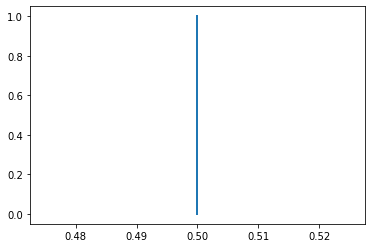

In [20]:
#visualize results and compute/compare prediction accuracy for regular dense and DAG architectures
plt.plot(rounded_dense_prediction, y_test)


In [ ]:
plt.plot(rounded_dag_prediction, y_test)